In [5]:
import numpy as np
import random
import pandas as pd
from pandas import plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)  
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import  accuracy_score


import xgboost as xgb
import lightgbm as  lgb
from xgboost.sklearn import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.preprocessing import StandardScaler, LabelBinarizer
# auxiliary function
from sklearn.preprocessing import LabelEncoder
def random_colors(number_of_colors):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(number_of_colors)]
    return color


import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv(r"C:\Users\thinh\ML Projects\datasets\iris\Iris.csv")
table = ff.create_table(df.head())

In [7]:
py.iplot(table,filename='jupyter-table1')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [12]:
Species = df["Species"].unique()
Species

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:
species_count = df['Species'].value_counts()
data = [go.Bar(
    x = species_count.index,
    y = species_count.values,
    marker = dict(color = random_colors(3))
)]
py.iplot(data)

In [14]:
corelation = df.corr()
data = [go.Heatmap(z = np.array(corelation.values),
                   x = np.array(corelation.columns),
                   y = np.array(corelation.columns),
                    colorscale='Blackbody',)
       ]
py.iplot(data)

In [15]:
setosa = go.Scatter(x = df['SepalLengthCm'][df.Species =='Iris-setosa'], y = df['SepalWidthCm'][df.Species =='Iris-setosa']
                   , mode = 'markers', name = 'setosa')
versicolor = go.Scatter(x = df['SepalLengthCm'][df.Species =='Iris-versicolor'], y = df['SepalWidthCm'][df.Species =='Iris-versicolor']
                   , mode = 'markers', name = 'versicolor')
virginica = go.Scatter(x = df['SepalLengthCm'][df.Species =='Iris-virginica'], y = df['SepalWidthCm'][df.Species =='Iris-virginica']
                   , mode = 'markers', name = 'virginica')
data = [setosa, versicolor, virginica]

fig = dict(data=data)
py.iplot(fig, filename='styled-scatter')

In [16]:
setosa = go.Scatter(x = df['PetalLengthCm'][df.Species =='Iris-setosa'], y = df['PetalWidthCm'][df.Species =='Iris-setosa']
                   , mode = 'markers', name = 'setosa')
versicolor = go.Scatter(x = df['PetalLengthCm'][df.Species =='Iris-versicolor'], y = df['PetalWidthCm'][df.Species =='Iris-versicolor']
                   , mode = 'markers', name = 'versicolor')
virginica = go.Scatter(x = df['PetalLengthCm'][df.Species =='Iris-virginica'], y = df['PetalWidthCm'][df.Species =='Iris-virginica']
                   , mode = 'markers', name = 'virginica')
data = [setosa, versicolor, virginica]

fig = dict(data=data)
py.iplot(fig, filename='styled-scatter')

In [17]:
trace0 = go.Box(y=df['PetalWidthCm'][df['Species'] == 'Iris-setosa'],
                boxmean=True, name = 'setosa')

trace1 = go.Box(y=df['PetalWidthCm'][df['Species'] == 'Iris-versicolor'],
                boxmean=True, name = 'versicolor')

trace2 = go.Box(y=df['PetalWidthCm'][df['Species'] == 'Iris-virginica'],
                boxmean=True, name = 'virginica')

data = [trace0, trace1, trace2]
py.iplot(data)

In [18]:
trace0 = go.Box(y=df['PetalLengthCm'][df['Species'] == 'Iris-setosa'],name = 'setosa')

trace1 = go.Box(y=df['PetalLengthCm'][df['Species'] == 'Iris-versicolor'], name = 'versicolor')

trace2 = go.Box(y=df['PetalLengthCm'][df['Species'] == 'Iris-virginica'], name = 'virginica')

data = [trace0, trace1, trace2]
py.iplot(data)

In [19]:
trace0 = go.Box(y=df['SepalLengthCm'][df['Species'] == 'Iris-setosa'], name = 'setosa')

trace1 = go.Box(y=df['SepalLengthCm'][df['Species'] == 'Iris-versicolor'], name = 'versicolor')

trace2 = go.Box(y=df['SepalLengthCm'][df['Species'] == 'Iris-virginica'], name = 'virginica')

data = [trace0, trace1, trace2]
py.iplot(data)

In [20]:
setosa = go.Box(y=df['SepalWidthCm'][df['Species'] == 'Iris-setosa'])

versicolor = go.Box(y=df['SepalWidthCm'][df['Species'] == 'Iris-versicolor'])

virginica = go.Box(y=df['SepalWidthCm'][df['Species'] == 'Iris-virginica'])

data = [trace0, trace1, trace2]
py.iplot(data)

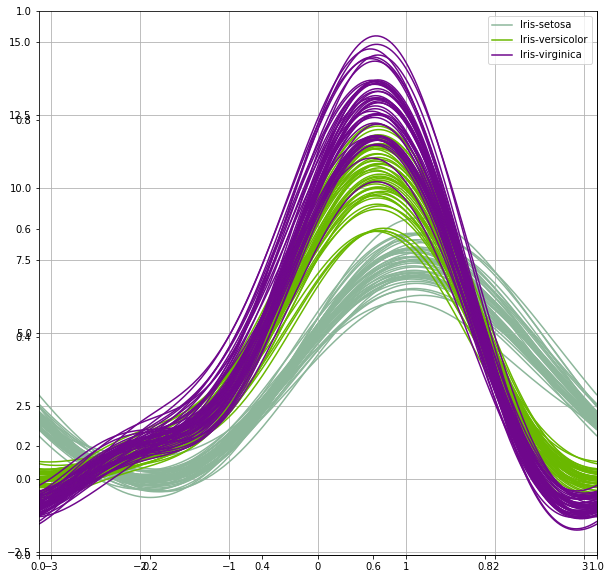

In [22]:
plt.subplots(figsize = (10,10))
plotting.andrews_curves(df.drop("Id", axis=1), "Species")

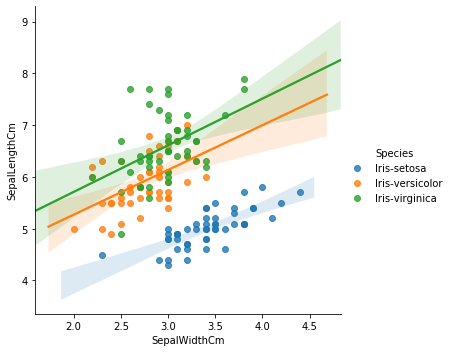

In [23]:
g = sns.lmplot(x="SepalWidthCm", y="SepalLengthCm", hue="Species", data=df)

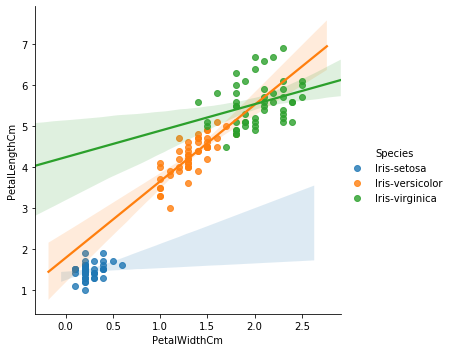

In [24]:
g = sns.lmplot(x="PetalWidthCm", y="PetalLengthCm", hue="Species", data=df)

In [25]:
# apply ML
x = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = df['Species']

In [27]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [28]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

In [30]:
# >>>>>>>>>>>>>>>>>>>>>>> LINEAR REGRESSION <<<<<<<<<<<<<<<<<<<<<<<<<<<<<
# logistic regression analyzing a dataset in which there are one or more independent variables that determine an outcome.
# The outcome is measured with a dichotomous variable (in which there are only two possible outcomes)
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
lr_predict = lr_model.predict(x_test)

print('Logistic Regression - ',accuracy_score(lr_predict,y_test))

Logistic Regression -  0.9555555555555556


In [31]:
# suport vector machine
# plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. 
# Then, we perform classification by finding the hyper-plane that differentiate the two classes very well.
svm_model = SVC(kernel='linear')
svm_model.fit(x_train,y_train)
svc_predict = svm_model.predict(x_test)

print('SVM - ',accuracy_score(svc_predict,y_test))

SVM -  1.0


In [32]:
# naive bayes classification
# a probabilistic classifier that makes classifications using the Maximum A Posteriori decision rule in a Bayesian setting. 
# It can also be represented using a very simple Bayesian network. 
# Naive Bayes classifiers have been especially popular for text classification, and are a traditional solution for problems such as spam detection.
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)
nb_predict = nb_model.predict(x_test)

print('Naive bayes - ',accuracy_score(nb_predict,y_test))

Naive bayes -  0.9555555555555556


In [33]:
# desicion tree
# It works for both categorical and continuous input and output variables. 
# In this technique, we split the population or sample into two or more homogeneous sets (or sub-populations) based on most significant splitter / differentiator in input variables
dt_model = DecisionTreeClassifier(max_leaf_nodes=3)
dt_model.fit(x_train,y_train)
dt_predict = dt_model.predict(x_test)

print('Decision Tree - ',accuracy_score(dt_predict,y_test))

Decision Tree -  0.9333333333333333


In [34]:
# random forest
rfc_model = RandomForestClassifier(max_depth=3)
rfc_model.fit(x_train,y_train)
rfc_predict = rfc_model.predict(x_test)

print('Random Forest - ',accuracy_score(rfc_predict,y_test))

Random Forest -  0.9333333333333333


In [35]:
# extra tree classifier
etc_model = ExtraTreesClassifier()
etc_model.fit(x_train,y_train)
etc_predict = etc_model.predict(x_test)

print('Extra Tree Classifier - ',accuracy_score(etc_predict,y_test))

Extra Tree Classifier -  1.0


In [36]:
# K nearest neighbor
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)
knn_predict = knn_model.predict(x_test)

print('knn - ',accuracy_score(knn_predict,y_test))

knn -  1.0


In [39]:
# XGBoost
xg_model = xgb.XGBClassifier()
xg_model = xg_model.fit(x_train,y_train)
xg_predict = xg_model.predict(x_test)

print('XGBoost - ', accuracy_score(xg_predict, y_test))

XGBoost -  0.9777777777777777
